# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

1. Reading and understading the data
2. Training the model
3. Residual Analysis
4. Predicting and evaluating the test set

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
#Suppress Warning

import warnings
warnings.filterwarnings('ignore')

In [55]:
#import numpy and pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [3]:
#import the given sample file and see the records

advertising=pd.read_csv('advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


4th Column 'Sales' are our target variable and other three columns are predictive variables.

In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


200 Non-Null values means there are not any null values

In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


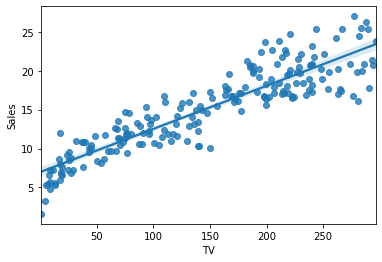

In [7]:
sns.regplot(x='TV',y='Sales',data=advertising)
plt.show()

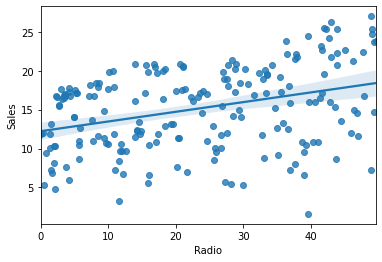

In [8]:
sns.regplot(x='Radio',y='Sales',data=advertising)
plt.show()

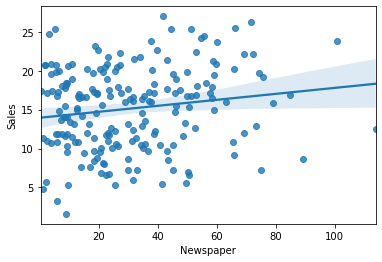

In [9]:
sns.regplot(x='Newspaper',y='Sales',data=advertising)
plt.show()

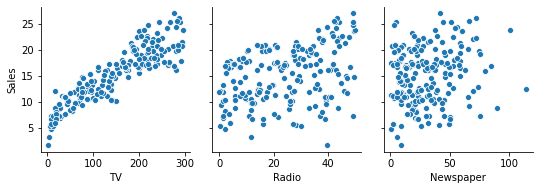

In [10]:
sns.pairplot(data=advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales')
plt.show()

In [11]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


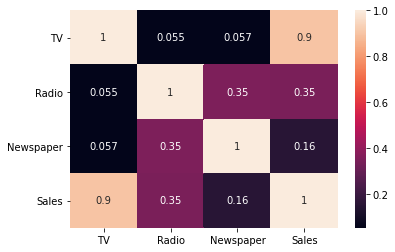

In [12]:
sns.heatmap(advertising.corr(), annot=True)
plt.show()

---
## Step 2: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Steps:
- Create X and y
- Create train and test set(70-30,80-20)
- Train your models on train set(i.e. learn the coefficients)
- Evalute the model (training set, test set)

X is in Caps and y is in small. Its because of standard. X is a dataframe not a single colum and y is single column or variable

In [13]:
#Create X and y
X=advertising['TV']
y=advertising['Sales']

In [14]:
# train-test split
X_train, X_test, y_train,y_test=train_test_split(X,y,train_size=0.70,test_size = 0.3,random_state=100)

#### We can remove test_size but it will automaticaly assigne 0.3 value to test_size

In [15]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((140,), (60,), (140,), (60,))

In [16]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [29]:
# Training the model
X_train_sm=sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [30]:
# y=c+m1. X1
# y=c.const+m1.TV

In [31]:
# fitting the model
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [32]:
# Sales=0.694+0.05.TV

In [33]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           1.52e-52
Time:                        15:13:48   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### F-statistic

You were introduced to a new term named F-statistic and Prob(F-statistic). Now, recall that in the last segment, you did a hypothesis test for beta to determine whether or not the coefficient 
β
1
 outputted by the model was significant or not. Now, F-statistic is similar in the sense that now instead of testing the significance of each of the betas, it tells you whether the overall model fit is significant or not. This parameter is examined because many a time it happens that even though all of your betas are significant, but your overall model fit might happen just by chance.

The heuristic is similar to what you learnt in the normal p-value calculation as well. If the 'Prob (F-statistic)' is less than 0.05, you can conclude that the overall model fit is significant. If it is greater than 0.05, you might need to review your model as the fit might be by chance, i.e. the line may have just luckily fit the data. In the image above, you can see that the p-value of the F-statistic is 1.52e-52  which is practically a zero value. This means that the model for which this was calculated is definitely significant since it is less than 0.05.

### R-squared

Like you studied earlier as well, R-squared value tells you exactly how much variance in the data has been explained by the model. In our case, the R-squared is about 0.816 which means that the model is able to explain 81.6% of the variance which is pretty good.

### Coefficients and p-values:

The p-values of the coefficients (in this case just one coefficient for TV) tell you whether the coefficient is significant or not. In this case, the coefficient of TV came out to be 0.0545 with a standard error of about 0.002. Thus, you got a t-value of 24.722 which lead to a practically zero p-value. Hence, you can say that your coefficient is indeed significant. 

In [34]:
# 1. coef and p-value
# 2. R-Squared is 81.6%, very high
# 3. p(F-Statistics) is low => the fit is not by chance

In [35]:
y_train_pred=lr_model.predict(X_train_sm)

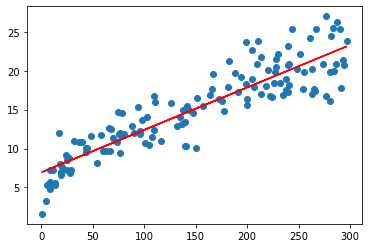

In [36]:
plt.scatter(X_train,y_train)
#plt.plot(X_train, 6.948 + 0.054*X_train,'r')
plt.plot(X_train, y_train_pred,'r')
plt.show()

In second line of plt.plot(), We are predicting y_train value using model(B0+B1*X). While in first row plt.scatter(), we draw actual y_train 

## Step 3. Residual Analysis

In [25]:
# error=f(y_tain,y_train_predicted)

In [38]:
res= y_train-y_train_pred
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

Text(0.5, 1.0, 'Residual Plot')

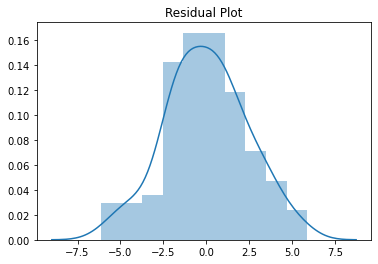

In [39]:
# plot residuals
plt.figure()
sns.distplot(res)
plt.title('Residual Plot')

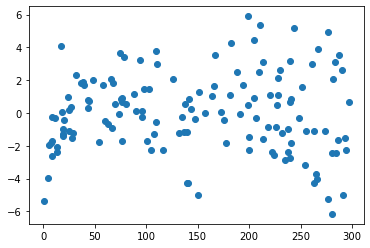

In [40]:
# look  for pattern in residuals ( we should not be able to identify)
plt.scatter(X_train,res)
plt.show()

## 4. Predictions on evaluation and Test Set

In [41]:
# Predictions on the test set(y_test_pred)
# evaluate the model, r-squared on the test

In [42]:
# add a cons/intercept to test
X_test_sm=sm.add_constant(X_test)

# pred on test
y_test_pred=lr_model.predict(X_test_sm)

In [47]:
# evaluate the model on r-squared, on the test
# r-squared
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7921031601245658

In [48]:
r2=r2_score(y_true=y_train,y_pred=y_train_pred)
r2

0.8157933136480389

In [49]:
# mean squared error
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

4.077556371826956

## Linear Regression Using SKLearn

In [51]:
# train the test split
X_train, X_test, y_train,y_test=train_test_split(X,y,train_size=0.70,test_size = 0.3,random_state=100)

In [59]:
X_train.shape
# reshape X_train to (140,1)
X_train_lm=X_train.values.reshape(-1,1)
X_test_lm=X_test.values.reshape(-1,1)

In [61]:
# Steps in sklearn model building

# 1. create an object of linear regression

lm=LinearRegression()

# 2. fit the model

lm.fit(X_train_lm,y_train)


LinearRegression()

In [65]:
# 3. see the params, make prediction(train,test)
print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [67]:
# make prediction
y_train_pred=lm.predict(X_train_lm)
y_test_pred=lm.predict(X_test_lm)

In [69]:
# 4. evaluate(r2, etc)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
